In [5]:
import glob
from bs4 import BeautifulSoup
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections  as mc

In [2]:
contestants = defaultdict(list)

rounds = ["1A", "1B", "1C", "2"]
for round in rounds:
    for pathname in glob.glob("input/Round {}*".format(round)):
        print(pathname)
        with open(pathname, "r") as f:
            html_doc = f.read()
        soup = BeautifulSoup(html_doc, 'html.parser')
        soup = soup.html.body
        
        names = soup.find_all("div","ranking-table__row-cell__displayname")
        names = [name.text.strip() for name in names]
        ranks = soup.find_all("div","ranking-table__row-cell__rank")
        ranks = [rank.text.strip() for rank in ranks]
        scores = soup.find_all("div","ranking-table__row-cell__score")
        scores = [score.text.strip() for score in scores]
        
        for name, rank, score in zip(names, ranks, scores):
            if round in ["1A", "1B", "1C"] and int(rank) > 1500:
                continue
            contestants[name].append((round,rank,score))

input/Round 1A 2019 - Code Jam (2020-05-02 21_38_03).html
input/Round 1A 2019 - Code Jam (2020-05-02 21_39_03).html
input/Round 1A 2019 - Code Jam (2020-05-02 21_38_27).html
input/Round 1A 2019 - Code Jam (2020-05-02 21_40_48).html
input/Round 1A 2019 - Code Jam (2020-05-02 21_37_35).html
input/Round 1A 2019 - Code Jam (2020-05-02 21_41_13).html
input/Round 1A 2019 - Code Jam (2020-05-02 21_39_57).html
input/Round 1A 2019 - Code Jam (2020-05-02 21_39_32).html
input/Round 1B 2019 - Code Jam (2020-05-02 21_39_58).html
input/Round 1B 2019 - Code Jam (2020-05-02 21_38_42).html
input/Round 1B 2019 - Code Jam (2020-05-02 21_40_53).html
input/Round 1B 2019 - Code Jam (2020-05-02 21_37_40).html
input/Round 1B 2019 - Code Jam (2020-05-02 21_41_18).html
input/Round 1B 2019 - Code Jam (2020-05-02 21_39_36).html
input/Round 1B 2019 - Code Jam (2020-05-02 21_39_13).html
input/Round 1B 2019 - Code Jam (2020-05-02 21_38_08).html
input/Round 1C 2019 - Code Jam (2020-05-02 21_39_38).html
input/Round 1C

In [3]:
data = []
for name, info in contestants.items():
    if len(info) < 2:
        continue
    if info[1][1] == '2443':
        continue
    else:
        data.append((info[0][0], info[0][1], info[1][1]))

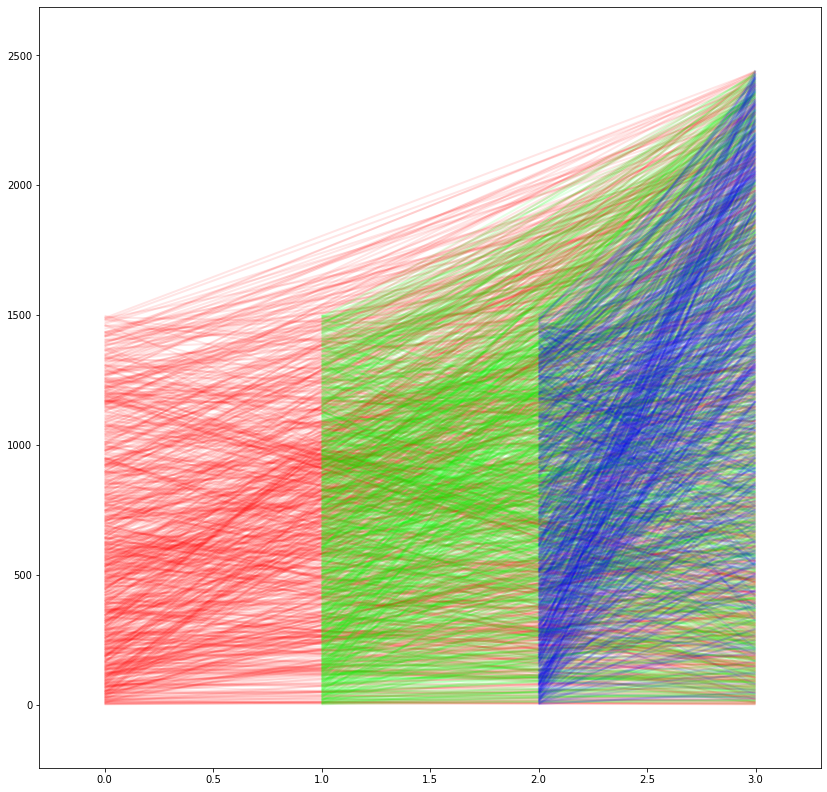

In [6]:
lines = []
colors = []
coloring = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
for round, pre, fin in data:
    lines.append([(rounds.index(round), pre), (3, fin)])
    colors.append(coloring[(rounds.index(round))])

lc = mc.LineCollection(lines, colors=colors, linewidths=2, alpha=0.1)
fig, ax = plt.subplots(figsize=(14,14))
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

In [7]:
data = []
for name, info in contestants.items():
    if len(info) < 2:
        continue
    if int(info[1][1]) > 1000:
        continue
    else:
        data.append((info[0][0], info[0][1], info[1][1]))

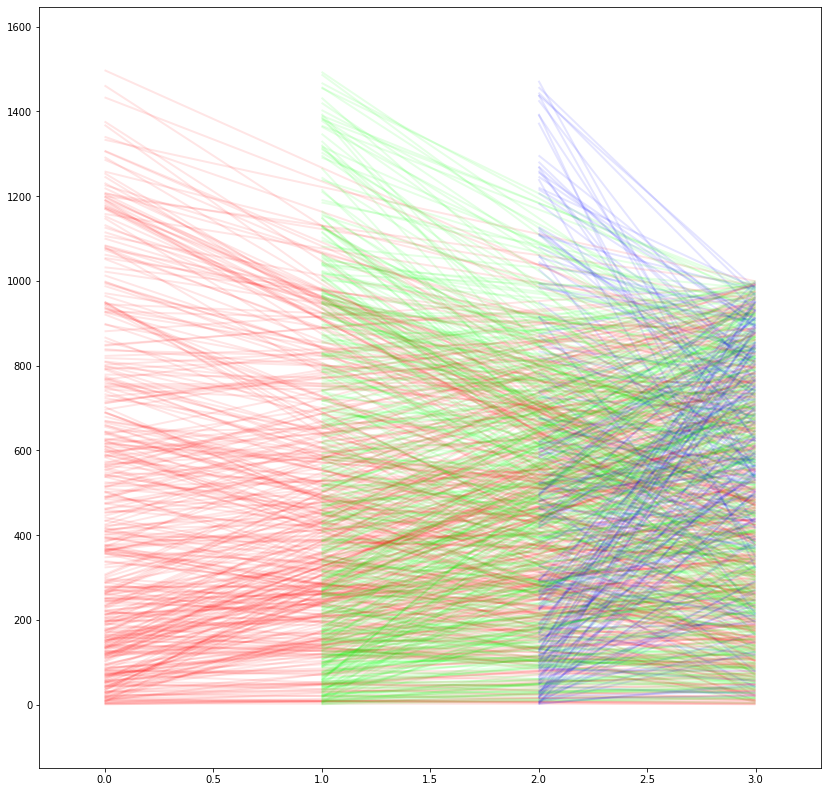

In [8]:
lines = []
colors = []
coloring = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
for round, pre, fin in data:
    lines.append([(rounds.index(round), pre), (3, fin)])
    colors.append(coloring[(rounds.index(round))])

lc = mc.LineCollection(lines, colors=colors, linewidths=2, alpha=0.1)
fig, ax = plt.subplots(figsize=(14,14))
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

In [9]:
Counter([d[0] for d in data])

Counter({'1A': 409, '1B': 417, '1C': 174})